In [1]:
%matplotlib inline
import sys
sys.path.append('..')

# Un vistazo a los datos
Vamos a cargar el vector de características.
    
Nota: las características tienen una nomenclatura del tipo "x_característica", donde x es un número, para mantener el orden original después de cambiar la nomenclatura del vector para ser consistente con el resto.

In [2]:
from dns_attacks_detection import *

In [3]:
try:
    dns = joblib.load('../vectors/EntropyAndRatiosFV_3JUL.pkl')
except FileNotFoundError:
    dns = create_feature_vector_from_log_file('../logs/3JUL.log', extract_features_entropy_and_ratios)
    joblib.dump(dns, '../vectors/EntropyAndRatiosFV_3JUL.pkl')

In [4]:
dns.head()

,0_letters,1_numbers,2_entropy,3_longest_letters,4_longest_number,5_longest_meaningful,6_symbols,attack
0,1.0,0.0,0.528321,1.0,0.0,0.333333,0.0,0
1,1.0,0.0,0.430827,1.0,0.0,1.000000,0.0,0
2,1.0,0.0,0.528321,1.0,0.0,0.333333,0.0,0
3,1.0,0.0,0.000000,1.0,0.0,0.333333,0.0,0
4,1.0,0.0,0.327523,1.0,0.0,0.444444,0.0,0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 8 columns):
0_letters               52610 non-null float64
1_numbers               52610 non-null float64
2_entropy               52610 non-null float64
3_longest_letters       52610 non-null float64
4_longest_number        52610 non-null float64
5_longest_meaningful    52610 non-null float64
6_symbols               52610 non-null float64
attack                  52610 non-null int64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [6]:
dns.describe()

,0_letters,1_numbers,2_entropy,3_longest_letters,4_longest_number,5_longest_meaningful,6_symbols,attack
count,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,0.887117,0.111230,0.376470,0.875555,0.102316,0.615653,0.001654,0.050960
std,0.277083,0.277009,0.122499,0.291470,0.266150,0.308742,0.013217,0.219918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.304012,1.000000,0.000000,0.428571,0.000000,0.000000
50%,1.000000,0.000000,0.375272,1.000000,0.000000,0.600000,0.000000,0.000000
75%,1.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.528321,1.000000,1.000000,1.000000,0.250000,1.000000


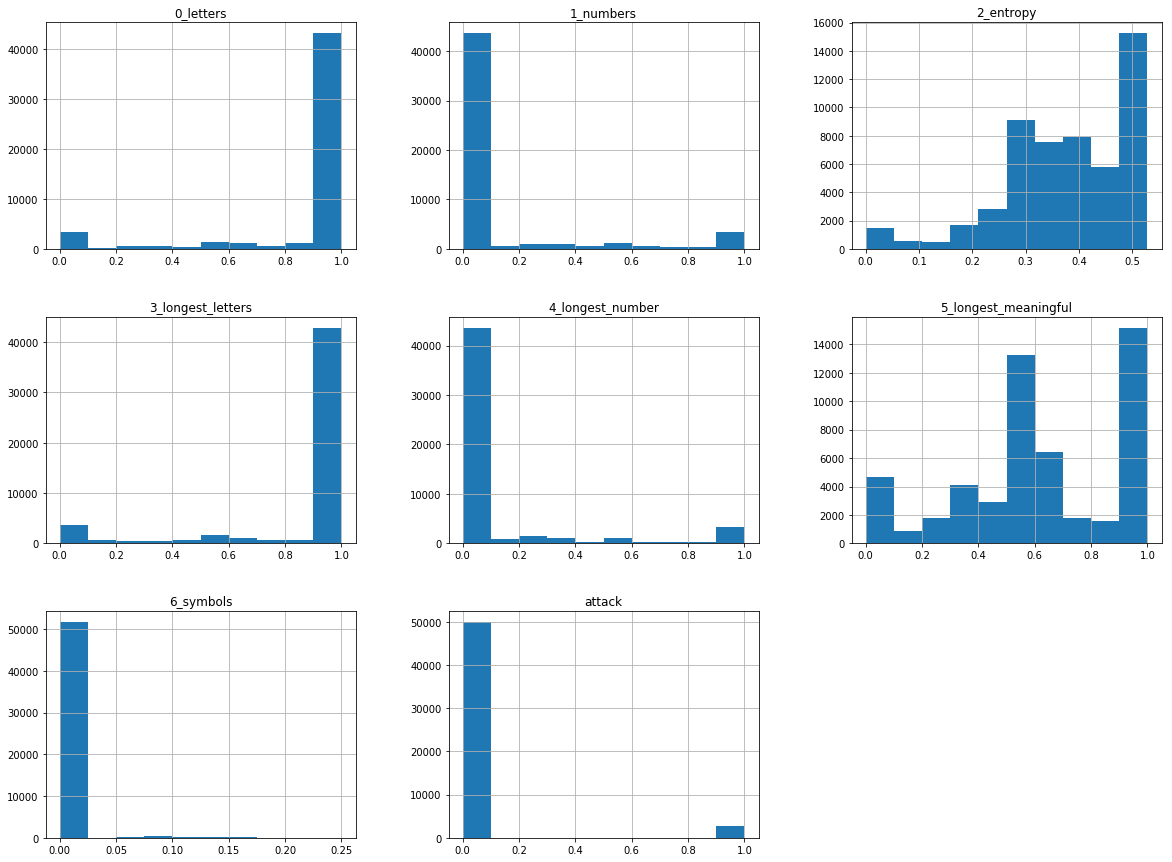

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
train_set, test_set = split_train_and_test_sets(dns, 'attack')

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack                  1.000000
1_numbers               0.355623
4_longest_number        0.241213
6_symbols              -0.029131
2_entropy              -0.303808
0_letters              -0.354139
5_longest_meaningful   -0.362915
3_longest_letters      -0.415943
Name: attack, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41483a1da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4142e2fc88>]], dtype=object)

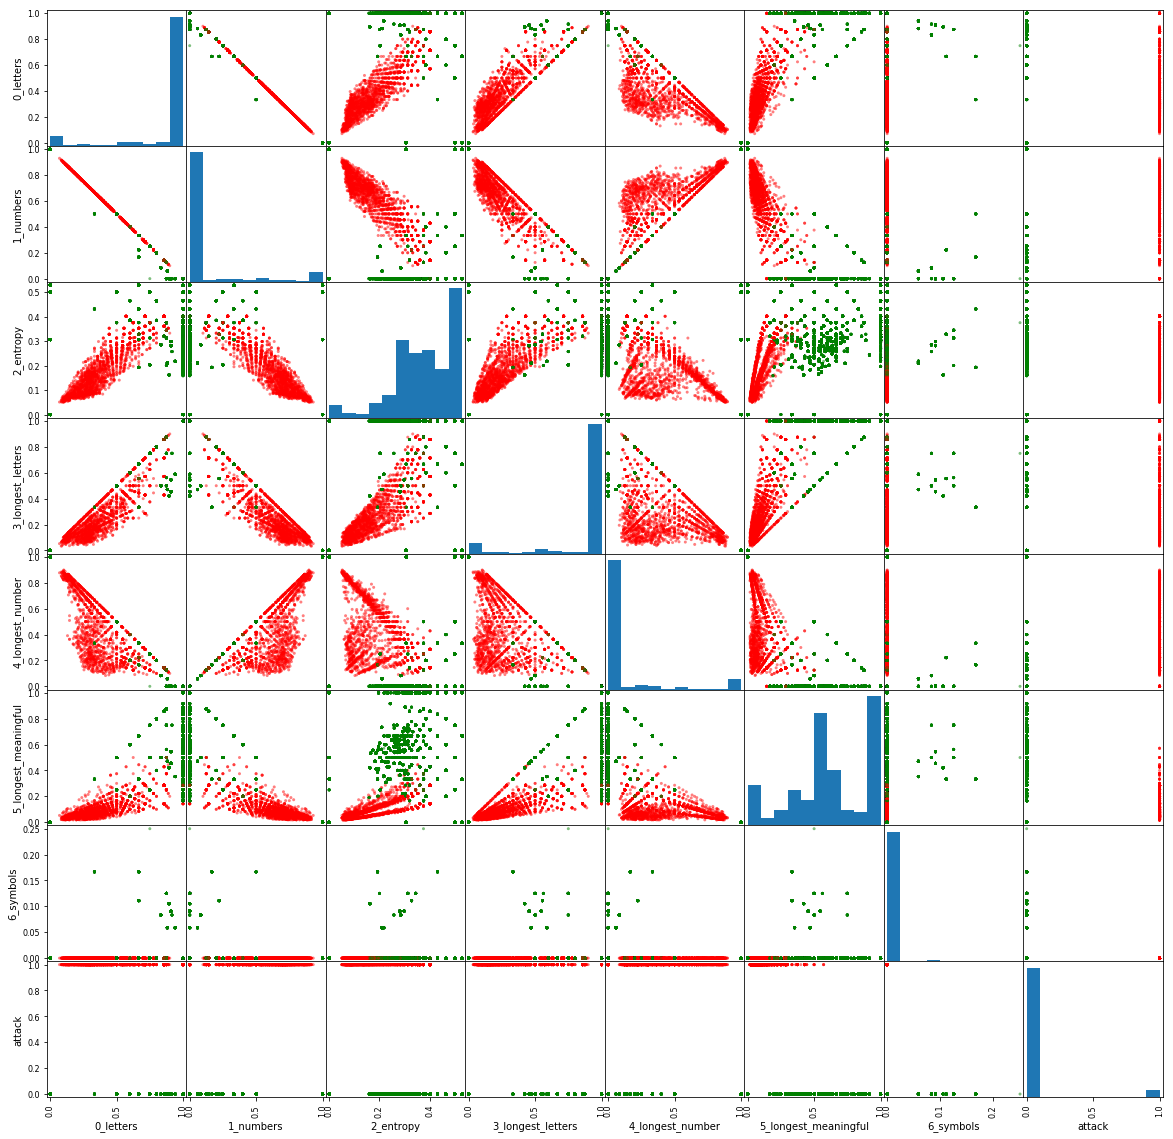

In [146]:
attributes = train_set_copy.columns
col_map = {0:'green', 1:'red'}
colours = list(map(lambda x:col_map.get(x), train_set_copy['attack']))
scatter_matrix(train_set_copy[attributes], figsize=(20, 20), c=colours)

# Selección y entrenamiento de modelos

En este apartado vamos a entrenar distintos tipos de modelos y haremos una selección de los que mejor rendimiento tengan.

In [14]:
features = train_set.drop('attack', 1)
features

,0_letters,1_numbers,2_entropy,3_longest_letters,4_longest_number,5_longest_meaningful,6_symbols
19038,1.000000,0.000000,0.500000,1.000000,0.000000,0.500000,0.0
34347,1.000000,0.000000,0.306099,1.000000,0.000000,0.666667,0.0
38293,1.000000,0.000000,0.464386,1.000000,0.000000,1.000000,0.0
15027,1.000000,0.000000,0.360234,1.000000,0.000000,0.857143,0.0
32646,1.000000,0.000000,0.319716,1.000000,0.000000,1.000000,0.0
18206,0.315789,0.684211,0.190334,0.157895,0.210526,0.052632,0.0
40710,1.000000,0.000000,0.319418,1.000000,0.000000,0.428571,0.0
47415,1.000000,0.000000,0.464386,1.000000,0.000000,1.000000,0.0
21099,1.000000,0.000000,0.264907,1.000000,0.000000,0.636364,0.0
10444,1.000000,0.000000,0.319716,1.000000,0.000000,0.333333,0.0


In [15]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [16]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [18]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [19]:
confusion_matrix(labels, train_predicted_labels)

array([[39888,    55],
       [ 1149,   996]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [20]:
precision_score(labels, train_predicted_labels)

0.94766888677450045

In [21]:
recall_score(labels, train_predicted_labels)

0.46433566433566431

In [22]:
f1_score(labels, train_predicted_labels)

0.62327909887359201

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [23]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method='decision_function')

In [24]:
labels_scores

array([-2.44715582, -2.8594033 , -4.44490355, ..., -3.25739786,
       -4.58837435, -4.82570462])

Las puntuaciones viven entre los valores -4.86 y 5.08:

In [25]:
labels_scores.min()

-4.8629868483659902

In [26]:
labels_scores.max()

5.0820255552832378

Tracemos la curva de precisión vs. exhaustividad.

In [27]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

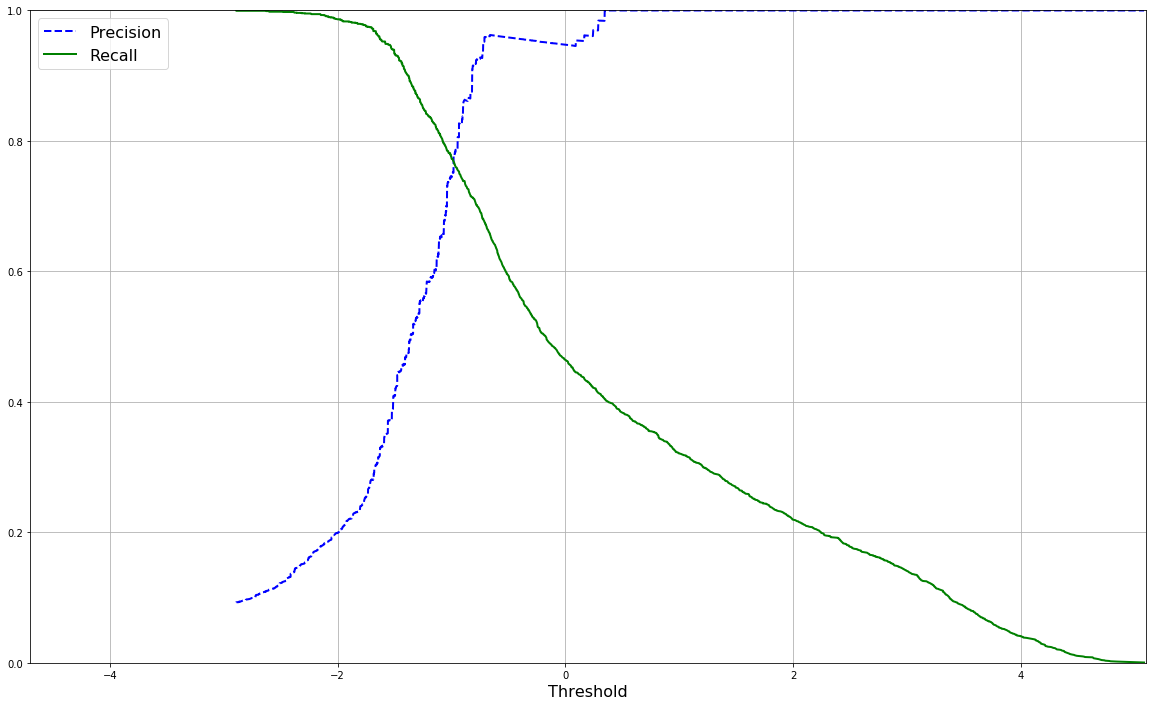

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4.7, 5.1])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

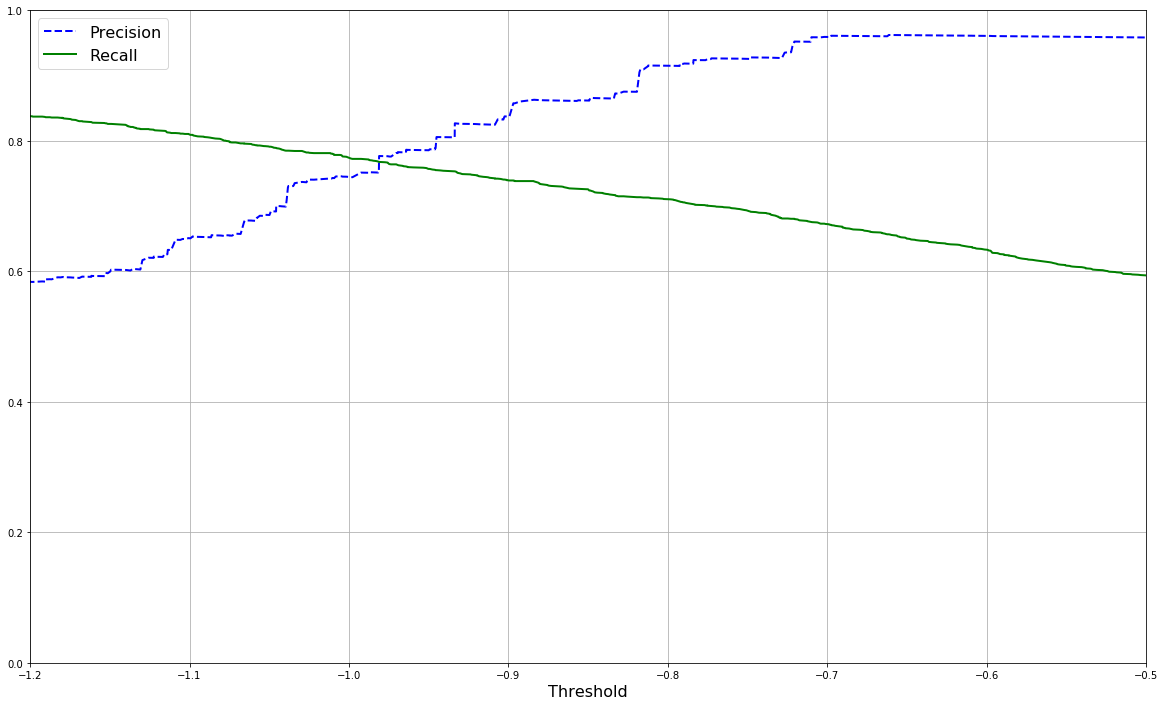

In [29]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

Comprobamos los valores de precisión y exhaustividad ajustando el umbral a -0.98:

In [30]:
labels_train_pred_70 = (labels_scores > -0.98)

In [31]:
confusion_matrix(labels, labels_train_pred_70)

array([[39470,   473],
       [  499,  1646]])

In [32]:
precision_score(labels, labels_train_pred_70)

0.7767815007078811

In [33]:
recall_score(labels, labels_train_pred_70)

0.76736596736596741

In [34]:
f1_score(labels, labels_train_pred_70)

0.77204502814258913

## Logistic Regression classifier

In [35]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [37]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [38]:
confusion_matrix(labels, train_predicted_labels)

array([[39906,    37],
       [  848,  1297]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [39]:
precision_score(labels, train_predicted_labels)

0.97226386806596699

In [40]:
recall_score(labels, train_predicted_labels)

0.6046620046620047

In [41]:
f1_score(labels, train_predicted_labels)

0.74561655648174763

### Análisis

Para poder representar gráficamente cómo actúa el modelo y analizarlo más fácilmente, dejemos sólo dos características: longest_letters y entropy.

In [42]:
reduced_features = features.drop(['0_letters', '1_numbers', '6_symbols', '4_longest_number', '5_longest_meaningful'], 1)
train_predicted_labels = cross_val_predict(log_reg_clf, reduced_features, labels, cv=5)

In [43]:
confusion_matrix(labels, train_predicted_labels)

array([[39682,   261],
       [ 1324,   821]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [44]:
precision_score(labels, train_predicted_labels)

0.75878003696857665

In [45]:
recall_score(labels, train_predicted_labels)

0.38275058275058277

In [46]:
f1_score(labels, train_predicted_labels)

0.50883173225906408

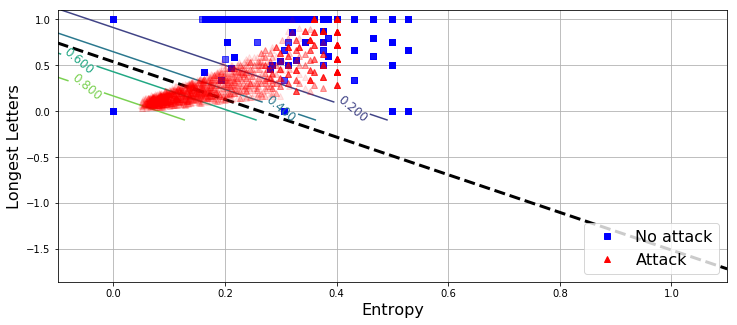

In [47]:
log_reg_clf.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_logistic_regression(log_reg_clf, [-0.1, 1.1, -0.1, 1.1])

X = reduced_features.values
y = labels.values

plot_dataset(X, y, "Entropy", "Longest Letters")

plt.show()

## Support Vector Machines

* ## Con Polynomial Kernel

In [48]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=3, coef0=1, C=5)
svm_clf_poly.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print("Predictions:", svm_clf_poly.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [50]:
train_predicted_labels = cross_val_predict(svm_clf_poly, features, labels, cv=5)

In [51]:
confusion_matrix(labels, train_predicted_labels)

array([[39803,   140],
       [  237,  1908]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [52]:
precision_score(labels, train_predicted_labels)

0.931640625

In [53]:
recall_score(labels, train_predicted_labels)

0.8895104895104895

In [54]:
f1_score(labels, train_predicted_labels)

0.91008824230860952

### Análisis

Volvamos a usar el vector que tiene sólo las dos características para facilitar el análisis.

In [55]:
train_predicted_labels = cross_val_predict(svm_clf_poly, reduced_features, labels, cv=5)

In [56]:
confusion_matrix(labels, train_predicted_labels)

array([[39159,   784],
       [  559,  1586]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [57]:
precision_score(labels, train_predicted_labels)

0.6691983122362869

In [58]:
recall_score(labels, train_predicted_labels)

0.73939393939393938

In [59]:
f1_score(labels, train_predicted_labels)

0.70254706533776301

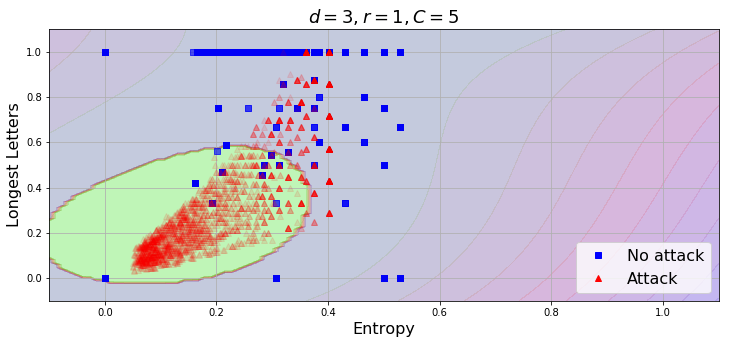

In [60]:
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1]) 

plot_dataset(X, y, "Entropy", "Longest Letters")

plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.show()

Aumento del grado de la función polinómica del kernel y la penalización por error:

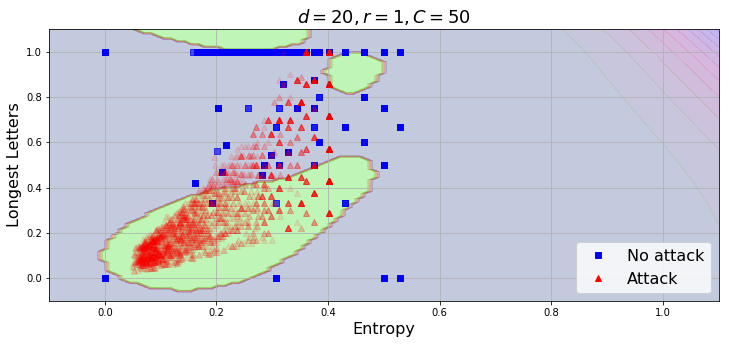

In [61]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=20, coef0=1, C=50)
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Letters")

plt.title(r"$d=20, r=1, C=50$", fontsize=18)

plt.show()

* ## Con Gaussian RBF Kernel

In [62]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma=5, C=5)
svm_clf_rbf.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
print("Predictions:", svm_clf_rbf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [64]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, features, labels, cv=5)

In [65]:
confusion_matrix(labels, train_predicted_labels)

array([[39930,    13],
       [  114,  2031]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [66]:
precision_score(labels, train_predicted_labels)

0.99363992172211346

In [67]:
recall_score(labels, train_predicted_labels)

0.94685314685314681

In [68]:
f1_score(labels, train_predicted_labels)

0.96968250179040349

### Análisis

Usemos de nuevo el vector con las características reducidas para la representación gráfica.

In [69]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, reduced_features, labels, cv=5)

In [70]:
confusion_matrix(labels, train_predicted_labels)

array([[39871,    72],
       [  666,  1479]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [71]:
precision_score(labels, train_predicted_labels)

0.95357833655705992

In [72]:
recall_score(labels, train_predicted_labels)

0.68951048951048954

In [73]:
f1_score(labels, train_predicted_labels)

0.80032467532467533

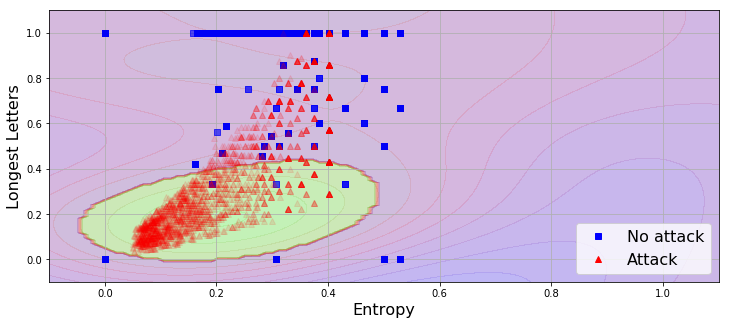

In [74]:
svm_clf_rbf.fit(reduced_features, labels)
plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_rbf, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Letters")

plt.show()

## Decision Trees

In [75]:
tree_clf = DecisionTreeClassifier(random_state=13)
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [76]:
print("Predictions:", tree_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [77]:
train_predicted_labels = cross_val_predict(tree_clf, features, labels, cv=5)

In [78]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   50,  2095]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [79]:
precision_score(labels, train_predicted_labels)

0.99430469862363546

In [80]:
recall_score(labels, train_predicted_labels)

0.9766899766899767

In [81]:
f1_score(labels, train_predicted_labels)

0.98541862652869239

### Análisis

In [82]:
export_graphviz(
        tree_clf,
        out_file='../images/tree_clf_dns_entropy.dot',
        feature_names=features.columns,
        class_names=['No attack', 'Attack'],
        rounded=True,
        filled=True
    )

![tree_clf_dns.png](../images/tree_clf_dns_entropy.png "Árbol de decisión")

## K-Nearest-Neighbors

In [83]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
print("Predictions:", knn_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [85]:
train_predicted_labels = cross_val_predict(knn_clf, features, labels, cv=5)

In [86]:
confusion_matrix(labels, train_predicted_labels)

array([[39932,    11],
       [   65,  2080]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [87]:
precision_score(labels, train_predicted_labels)

0.99473935915829748

In [88]:
recall_score(labels, train_predicted_labels)

0.96969696969696972

In [89]:
f1_score(labels, train_predicted_labels)

0.98205854579792273

### Análisis

Hagamos una representación gráfica usando el vector con características reducidas.

In [90]:
train_predicted_labels = cross_val_predict(knn_clf, reduced_features, labels, cv=5)

In [91]:
confusion_matrix(labels, train_predicted_labels)

array([[39935,     8],
       [  151,  1994]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [92]:
precision_score(labels, train_predicted_labels)

0.99600399600399603

In [93]:
recall_score(labels, train_predicted_labels)

0.92960372960372961

In [94]:
f1_score(labels, train_predicted_labels)

0.96165903062454772

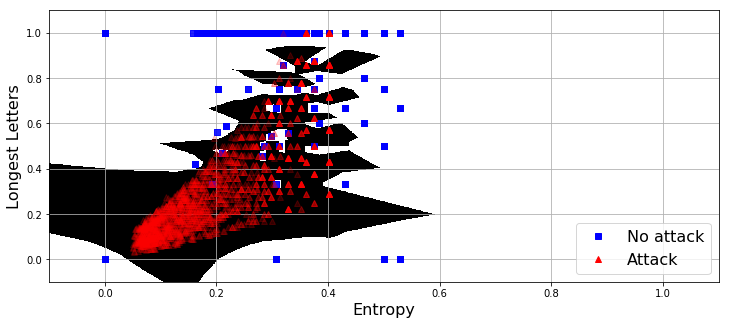

In [95]:
knn_clf_red = KNeighborsClassifier()
knn_clf_red.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_KNN(knn_clf_red, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Letters", 0.2)

plt.show()

# Afinación de Modelos

## Support Vector Machines (Gaussian RBF Kernel)

### Randomized Search

In [96]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13)
param_distribs = {
        'gamma': randint(low=1, high=100),
        'C': randint(low=1, high=500),
    }
svm_clf_rbf_rnd_search = RandomizedSearchCV(svm_clf_rbf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
svm_clf_rbf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436d8c18>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436d8748>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [97]:
search_results = svm_clf_rbf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.976223698686 {'C': 339, 'gamma': 49}
0.956177233715 {'C': 75, 'gamma': 17}
0.978088533781 {'C': 231, 'gamma': 99}
0.97575753145 {'C': 245, 'gamma': 26}
0.976689921306 {'C': 237, 'gamma': 59}
0.97575753145 {'C': 484, 'gamma': 27}
0.977156143926 {'C': 245, 'gamma': 67}
0.976689921306 {'C': 431, 'gamma': 55}
0.977156143926 {'C': 230, 'gamma': 78}
0.977156143926 {'C': 75, 'gamma': 74}


A partir de estos datos, al realizar el "Grid Search" nos centraremos en los valores de "C" y "gamma" más bajos, para evitar el sobreajuste ("overfitting").

### Grid Search

In [98]:
param_grid = {'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]}
svm_clf_rbf_grid_search = GridSearchCV(svm_clf_rbf, param_grid, cv=5, scoring='recall', return_train_score=False)
svm_clf_rbf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [99]:
search_results = svm_clf_rbf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.938927550622 {'C': 10, 'gamma': 1}
0.953846176 {'C': 10, 'gamma': 10}
0.957109512802 {'C': 10, 'gamma': 20}
0.97575753145 {'C': 10, 'gamma': 50}
0.939393828626 {'C': 20, 'gamma': 1}
0.95431239862 {'C': 20, 'gamma': 10}
0.955711121863 {'C': 20, 'gamma': 20}
0.976223698686 {'C': 20, 'gamma': 50}
0.939860162014 {'C': 30, 'gamma': 1}
0.956643456335 {'C': 30, 'gamma': 10}
0.956177233715 {'C': 30, 'gamma': 20}
0.976223698686 {'C': 30, 'gamma': 50}
0.941724830957 {'C': 50, 'gamma': 1}
0.955711066479 {'C': 50, 'gamma': 10}
0.956177233715 {'C': 50, 'gamma': 20}
0.976223698686 {'C': 50, 'gamma': 50}


Los valores de C=10 y gamma=10 parecen dar un resultado aceptable.

## Decision Trees

### Randomized Search

In [100]:
param_distribs = {
        'max_depth': randint(low=5, high=10),
        'min_samples_split': randint(low=12, high=25),
        'min_samples_leaf': randint(low=3, high=8)
    }
tree_clf_rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
tree_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436bf518>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436bfeb8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436bf668>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [101]:
search_results = tree_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.970629414937 {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 22}
0.907226018612 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.945920945303 {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 22}
0.970629414937 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.970163247701 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 21}
0.972960528036 {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 14}
0.908624686471 {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 17}
0.972028082796 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 18}
0.971095637556 {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.906759962144 {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 23}


Al añadir estos parámetros al árbol de decisión nos encontramos con valores más bajos de exahustividad que cuando el modelo no tenía parámetros. Es muy probable que el modelo sin parámetros estuviera sobreajustado, debido al propio funcionamiento del modelo. Si un árbol de decisión se deja sin restricciones, éste tenderá a ajustarse a los datos, adaptándose a ellos de forma muy cercana. Por lo tanto, hay muchas posibilidades de que un árbol de decisión sin restricciones estará sobreajustado.
Debido a esto, añadiremos algunos parámetros a nuestro árbol para que pueda generalizar más con nuevos conjuntos de datos.

### Grid Search

In [102]:
param_grid = {'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]}
tree_clf_grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
tree_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [103]:
search_results = tree_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.972960417268 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.972960417268 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.972960417268 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 18}
0.971095637556 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.971095637556 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.969230802461 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 18}
0.970629414937 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12}
0.970629414937 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 14}
0.970163247701 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 18}


El resultado son valores bastante similares de exahustividad. Para que el árbol de decisión generalice lo máximo posible, trataremos de maximizar los parámetros "min_\*" y minimizar los parámetros "max_\*".

## K-Nearest-Neighbors

### Randomized Search

In [104]:
param_distribs = {
        'n_neighbors': randint(low=1, high=50),
        'weights': ['distance']
    }
knn_clf_rnd_search = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='recall', random_state=13, return_train_score=False)
knn_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f41436d84a8>, 'weights': ['distance']},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [105]:
search_results = knn_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.972494139264 {'n_neighbors': 19, 'weights': 'distance'}
0.970163192317 {'n_neighbors': 49, 'weights': 'distance'}
0.973892807123 {'n_neighbors': 11, 'weights': 'distance'}
0.972494139264 {'n_neighbors': 17, 'weights': 'distance'}
0.970629414937 {'n_neighbors': 39, 'weights': 'distance'}


Usando el parámetro "distance" cambiamos el peso usado en la predicción. El peso por defecto es uniforme, por lo que cada vecino tiene el mismo peso. Al hacer este cambio, el peso de un vecino es calculado con la inversa de su distancia. Por lo tanto, los vecinos más cercanos tendrán más peso.

### Grid Search

In [106]:
param_grid = {'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']}
knn_clf_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
knn_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [107]:
search_results = knn_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.973426473735 {'n_neighbors': 3, 'weights': 'uniform'}
0.973426473735 {'n_neighbors': 3, 'weights': 'distance'}
0.971561749408 {'n_neighbors': 7, 'weights': 'uniform'}
0.973892807123 {'n_neighbors': 7, 'weights': 'distance'}
0.961771351312 {'n_neighbors': 15, 'weights': 'uniform'}
0.974359029743 {'n_neighbors': 15, 'weights': 'distance'}


No parece haber una gran variación en la exhaustividad, trataremos de adoptar un valor de número de vecinos intermedio para evitar el sobreajuste o el subajuste.

# Ensemble Learning

Debido a que ya hemos estrechado nuestras opciones con respecto a qué modelos usar y hemos ajustado los modelos más prometedores, ahora podemos probar a combinar varios modelos para ver si al ser usados conjuntamente, aumenta su rendimiento.

## Modelos Elegidos

Elegiremos los modelos con los siguientes parámetros:
- Support Vector Machines (Gaussian RBF Kernel): {'C': 10, 'gamma': 10}. Exhaustividad: 0.95.
- Decision Trees: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}. Exhaustividad: 0.97.
- K-Nearest-Neighbors: parámetros por defecto ({'n_neighbors': 5, 'weights': 'uniform'}). Exhaustividad: 0.97.

In [108]:
svm_clf_rbf_tuned = SVC(kernel='rbf', random_state=13, gamma=10, C=10)
svm_clf_rbf_tuned.fit(features, labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
tree_clf_tuned = DecisionTreeClassifier(random_state=13, max_depth=7, min_samples_leaf=4, min_samples_split=14)
tree_clf_tuned.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [110]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Voting Classifiers

Usa la técnica de agregar las predicciones de diferentes clasificadores seleccionando la clase que obtiene más votos.

### SVM + Decision Tree + KNN

In [111]:
voting_clf_s_d_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_d_k.fit(features, labels)

VotingClassifier(estimators=[('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [112]:
train_predicted_labels = cross_val_predict(voting_clf_s_d_k, features, labels, cv=5)

In [113]:
confusion_matrix(labels, train_predicted_labels)

array([[39932,    11],
       [   68,  2077]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [114]:
precision_score(labels, train_predicted_labels)

0.99473180076628354

In [115]:
recall_score(labels, train_predicted_labels)

0.96829836829836835

In [116]:
f1_score(labels, train_predicted_labels)

0.98133711315851646

### Decision Tree + KNN

In [117]:
voting_clf_d_k = VotingClassifier(
    estimators=[('dt', tree_clf_tuned), ('knn', knn_clf)], voting='soft')
voting_clf_d_k.fit(features, labels)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [118]:
train_predicted_labels = cross_val_predict(voting_clf_d_k, features, labels, cv=5)

In [119]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   57,  2088]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [120]:
precision_score(labels, train_predicted_labels)

0.99428571428571433

In [121]:
recall_score(labels, train_predicted_labels)

0.97342657342657346

In [122]:
f1_score(labels, train_predicted_labels)

0.98374558303886916

## Random Forests

La técnica anterior se sirve de varios algoritmos para realizar predicciones, utilizando el mismo conjunto de datos de aprendizaje. Otras técnicas de "ensemble learning" son "bagging" y "pasting". Éstas consisten en entrenar el mismo algoritmo pero con distintos subconjuntos de los datos de entrenamiento.

"Bagging" y "pasting" permiten que las instancias de entrenamiento sean usadas varias veces por diferentes predictores, pero solo "bagging" permite que una instancia sea usada varias veces por el mismo predictor. Son usadas mayormente con árboles de decisión, aunque se pueden usar con cualquier tipo de modelo. En este caso usaremos árboles de decisión creando el enfoque llamado "random forests".

In [123]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
rnd_clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [124]:
train_predicted_labels = cross_val_predict(rnd_clf, features, labels, cv=5)

In [125]:
confusion_matrix(labels, train_predicted_labels)

array([[39943,     0],
       [  118,  2027]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [126]:
precision_score(labels, train_predicted_labels)

1.0

In [127]:
recall_score(labels, train_predicted_labels)

0.94498834498834494

In [128]:
f1_score(labels, train_predicted_labels)

0.97171620325982744

## Extremely Randomized Trees

Una técnica muy similar a "random forests" pero añade más aleatoriedad ya que la elección de los umbrales para cada característica se realiza de forma aleatoria.

In [129]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
extra_clf.fit(features, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [130]:
train_predicted_labels = cross_val_predict(extra_clf, features, labels, cv=5)

In [131]:
confusion_matrix(labels, train_predicted_labels)

array([[39932,    11],
       [  160,  1985]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [132]:
precision_score(labels, train_predicted_labels)

0.99448897795591185

In [133]:
recall_score(labels, train_predicted_labels)

0.92540792540792538

In [134]:
f1_score(labels, train_predicted_labels)

0.95870562666022707

# Evaluar los Modelos con el "Test Set"

Después de probar varios modelos, seleccionar los mejores, ajustarlos y comprobar cómo funcionan cuando son combinados, podemos analizar su rendimiento usando el conjunto de datos que apartamos al principio como "test set". Los modelos nunca han visto esos datos, por lo tanto podemos ver como reaccionan con nuevos datos.

In [135]:
features_test = test_set.drop('attack', 1)

In [136]:
labels_test = test_set['attack']

## Support Vector Machines (Gaussian RBF Kernel)

In [137]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    svm_clf_rbf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.994186046512 
Recall:  0.957089552239 
F1:  0.975285171103 

 [[9983    3]
 [  23  513]]


## Decision Trees

In [138]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    tree_clf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.992366412214 
Recall:  0.970149253731 
F1:  0.981132075472 

 [[9982    4]
 [  16  520]]


## K-Nearest-Neighbors

In [139]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    knn_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.992409867173 
Recall:  0.975746268657 
F1:  0.98400752587 

 [[9982    4]
 [  13  523]]


## SVM + Decision Tree + KNN

In [140]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    voting_clf_s_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.992395437262 
Recall:  0.973880597015 
F1:  0.983050847458 

 [[9982    4]
 [  14  522]]


## Decision Tree + KNN

In [141]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    voting_clf_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.992380952381 
Recall:  0.972014925373 
F1:  0.982092365693 

 [[9982    4]
 [  15  521]]


## Random Forests

In [142]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    rnd_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  1.0 
Recall:  0.94776119403 
F1:  0.973180076628 

 [[9986    0]
 [  28  508]]


## Extremely Randomized Trees

In [143]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    extra_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.994059405941 
Recall:  0.936567164179 
F1:  0.964457252642 

 [[9983    3]
 [  34  502]]


In [144]:
directory = '../models/extract_features_entropy_and_ratios/'
joblib.dump(voting_clf_d_k, directory + 'decision_trees+knn.pkl')
joblib.dump(extra_clf, directory + 'extremely_randomized_trees.pkl')
joblib.dump(knn_clf, directory + 'knn.pkl')
joblib.dump(rnd_clf, directory + 'random_forests.pkl')

['../models/extract_features_entropy_and_ratios/random_forests.pkl']